In [1]:
import chess
from chess import pgn
import bz2

In [2]:
from chessbot import data

/home/spock/projects/ChessBot/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from chessbot.data import ChessDataModule

In [4]:
dm = ChessDataModule('/static/chess/data/lichess_db_standard_rated_2014-11.pgn.bz2.npy')
dm.setup()

In [5]:
dl = dm.train_dataloader()

In [7]:
data = next(iter(dl))

In [12]:
!poetry add more_itertools

Using version ^8.13.0 for more-itertools

Updating dependencies
Resolving dependencies... (1.1s)

Writing lock file

Package operations: 1 install, 0 updates, 0 removals

  • Installing more-itertools (8.13.0): Pending...
  • Installing more-itertools (8.13.0): Downloading... 0%
  • Installing more-itertools (8.13.0): Downloading... 100%
  • Installing more-itertools (8.13.0): Downloading... 100%
  • Installing more-itertools (8.13.0): Installing...
  • Installing more-itertools (8.13.0)


In [47]:
len(VOCAB)

69

In [60]:
def tokenize(x, vocab):
    """
    First token is A or B which we map to 
    Last token is w/l/d
    
    >>> list(tokenize('B e2e4 c7c5 g1f3 1', VOCAB))
        
    """
    tokens = x.split(' ')
    yield vocab[tokens[0]]
    yield vocab[' ']

    for token in tokens[1:-1]:
        yield vocab[token[0:2]]
        yield vocab[token[2:4]]
        yield vocab[' ']
    
    yield vocab[tokens[-1]]
list(tokenize('B e2e4 c7c5 g1f3 1', VOCAB))
        

[66, 64, 33, 35, 64, 22, 20, 64, 48, 42, 64, 68]

In [45]:
%debug

> /tmp/ipykernel_267671/2290638380.py(17)<listcomp>()
     15 
     16 
---> 17     return [vocab[c1+c2] for c1,c2 in chunked(x[2:-2],2)]
     18 
     19 list(tokenize(data[0], VOCAB))



ipdb>  print(x)


*** NameError: name 'x' is not defined


ipdb>  u


> /tmp/ipykernel_267671/2290638380.py(17)tokenize()
     15 
     16 
---> 17     return [vocab[c1+c2] for c1,c2 in chunked(x[2:-2],2)]
     18 
     19 list(tokenize(data[0], VOCAB))



ipdb>  p x


'B e2e4 c7c5 g1f3 d7d6 d2d4 c5d4 d1d4 g8f6 c1g5 e7e6 g5f6 g7f6 b1c3 b8c6 f1b5 a7a6 b5c6 b7c6 e1c1 d6d5 e4d5 c6d5 h1e1 f8g7 c3d5 e8g8 d5b6 d8d4 d1d4 f6f5 d4b4 a8b8 b4b3 c8b7 b6d7 b7d5 d7b8 d5b3 b8a6 b3a2 b2b3 f8a8 a6b4 a2b1 f3e5 a8a1 c1b2 a1a2 b4a2 2'


ipdb>  list(chunked(x[2:-2],2))


*** Error in argument: '(chunked(x[2:-2],2))'


ipdb>  p list(chunked(x[2:-2],2))


[['e', '2'], ['e', '4'], [' ', 'c'], ['7', 'c'], ['5', ' '], ['g', '1'], ['f', '3'], [' ', 'd'], ['7', 'd'], ['6', ' '], ['d', '2'], ['d', '4'], [' ', 'c'], ['5', 'd'], ['4', ' '], ['d', '1'], ['d', '4'], [' ', 'g'], ['8', 'f'], ['6', ' '], ['c', '1'], ['g', '5'], [' ', 'e'], ['7', 'e'], ['6', ' '], ['g', '5'], ['f', '6'], [' ', 'g'], ['7', 'f'], ['6', ' '], ['b', '1'], ['c', '3'], [' ', 'b'], ['8', 'c'], ['6', ' '], ['f', '1'], ['b', '5'], [' ', 'a'], ['7', 'a'], ['6', ' '], ['b', '5'], ['c', '6'], [' ', 'b'], ['7', 'c'], ['6', ' '], ['e', '1'], ['c', '1'], [' ', 'd'], ['6', 'd'], ['5', ' '], ['e', '4'], ['d', '5'], [' ', 'c'], ['6', 'd'], ['5', ' '], ['h', '1'], ['e', '1'], [' ', 'f'], ['8', 'g'], ['7', ' '], ['c', '3'], ['d', '5'], [' ', 'e'], ['8', 'g'], ['8', ' '], ['d', '5'], ['b', '6'], [' ', 'd'], ['8', 'd'], ['4', ' '], ['d', '1'], ['d', '4'], [' ', 'f'], ['6', 'f'], ['5', ' '], ['d', '4'], ['b', '4'], [' ', 'a'], ['8', 'b'], ['8', ' '], ['b', '4'], ['b', '3'], [' ', 'c'], ['8

ipdb>  q


In [11]:
data


['B e2e4 c7c5 g1f3 d7d6 d2d4 c5d4 d1d4 g8f6 c1g5 e7e6 g5f6 g7f6 b1c3 b8c6 f1b5 a7a6 b5c6 b7c6 e1c1 d6d5 e4d5 c6d5 h1e1 f8g7 c3d5 e8g8 d5b6 d8d4 d1d4 f6f5 d4b4 a8b8 b4b3 c8b7 b6d7 b7d5 d7b8 d5b3 b8a6 b3a2 b2b3 f8a8 a6b4 a2b1 f3e5 a8a1 c1b2 a1a2 b4a2 2',
 'B f2f4 e7e5 g1f3 e5f4 d2d4 g7g5 h2h4 f7f6 h4g5 f6g5 f3e5 d7d6 e5d3 c8f5 e2e3 f4e3 c1e3 d8e7 d1d2 b8d7 b1c3 e8c8 e1c1 d8e8 e3g5 g8f6 c3d5 e7g7 d5f6 d7f6 g5f6 g7f6 d3f4 f5g6 f4g6 f6g6 f1d3 g6g7 c2c3 f8e7 c1b1 e7g5 d2c2 h7h6 d3e2 e8e3 e2f3 h8e8 c2a4 c8b8 a4b5 c7c5 d4c5 d6c5 b5c5 e8c8 c5d6 g7c7 d6c7 c8c7 b1c2 c7e7 d1d3 e3d3 c2d3 e7e3 d3d4 b8c7 h1h5 e3e7 h5h1 e7d7 d4e5 d7d2 h1b1 b7b6 a2a4 a7a5 b2b4 a5b4 b1b4 d2c2 b4c4 c7d7 f3c6 d7e7 c6b5 g5d2 c4c7 e7f8 c3c4 d2e3 g2g4 c2f2 c7c6 f8e7 c6c7 e7d8 c7g7 d8c8 e5d6 e3c5 d6c6 f2f6 c6d5 c8d8 d5e5 f6f2 g7g6 c5e3 e5d6 f2d2 d6c6 d8e8 c6c7 e8f8 g6c6 e3c5 c6c5 b6c5 c7c6 d2b2 c6c5 b2g2 a4a5 g2g4 a5a6 g4g5 c5c6 g5b5 1',
 'B g1f3 b8c6 g2g3 g7g6 f1g2 f8g7 e1g1 e7e6 e2e3 d7d5 d2d3 g8e7 c2c3 e8g8 b1d2 d8d6 d3d4 

In [36]:
from chess import pgn
pgn.Game

chess.pgn.Game

In [34]:
%%time 
fpath = '/static/chess/data/lichess_db_standard_rated_2014-11.pgn.bz2'

games = []


CPU times: user 18.2 s, sys: 0 ns, total: 18.2 s
Wall time: 18.2 s


In [23]:
import numpy as np
z = np.array(games)
np.save('/tmp/test.npy',z)

In [30]:
len(games)

6

In [33]:
# np.memmap('/tmp/test.npy', )[2:4]

memmap([85, 77], dtype=uint8)

In [24]:
!ls -alh /tmp/test.npy

-rw-rw-r-- 1 spock spock 6.0K Jun 27 16:08 /tmp/test.npy


In [6]:
game_str

'B d2d4 d7d5 c2c4 g8f6 e2e3 e7e6 c4d5 f6d5 e3e4 f8b4 c1d2 b4d2 d1d2 d5f6 b1c3 e8g8 g1f3 b8c6 f1e2 f8e8 e1g1 e6e5 d4d5 c6e7 f3e5 e7d5 e5f7 g8f7 e2c4 c7c6 e4d5 c6d5 c3d5 c8e6 f1d1 a8c8 b2b3 c8c5 d2b4 c5d5 c4d5 e6d5 a1c1 d8d7 b4f4 e8c8 c1c8 d7c8 d1c1 d5c6 a2a4 c8g4 f4c7 f7g6 g2g3 g4f3 c1c6 b7c6 c7a7 f3d1 g1g2 d1d5 g2g1 f6g4 h2h3 g4e5 a4a5 d5b3 a5a6 b3d1 g1g2 d1f3 g2f1 e5d3 a7e3 f3d1 f1g2 d3e1 g2h2 e1c2 e3e4 g6f7 a6a7 c2d4 e4f4 f7g6 f4d6 g6g5 h3h4 g5f5 d6f4 f5e6 a7a8q d4f3 h2g2 f3e1 g2h3 d1d5 a8e8 2'

In [ ]:
from torch.io.

In [5]:
game_str

'B d2d4 d7d5 c2c4 g8f6 e2e3 e7e6 c4d5 f6d5 e3e4 f8b4 c1d2 b4d2 d1d2 d5f6 b1c3 e8g8 g1f3 b8c6 f1e2 f8e8 e1g1 e6e5 d4d5 c6e7 f3e5 e7d5 e5f7 g8f7 e2c4 c7c6 e4d5 c6d5 c3d5 c8e6 f1d1 a8c8 b2b3 c8c5 d2b4 c5d5 c4d5 e6d5 a1c1 d8d7 b4f4 e8c8 c1c8 d7c8 d1c1 d5c6 a2a4 c8g4 f4c7 f7g6 g2g3 g4f3 c1c6 b7c6 c7a7 f3d1 g1g2 d1d5 g2g1 f6g4 h2h3 g4e5 a4a5 d5b3 a5a6 b3d1 g1g2 d1f3 g2f1 e5d3 a7e3 f3d1 f1g2 d3e1 g2h2 e1c2 e3e4 g6f7 a6a7 c2d4 e4f4 f7g6 f4d6 g6g5 h3h4 g5f5 d6f4 f5e6 a7a8q d4f3 h2g2 f3e1 g2h3 d1d5 a8e8 2'

In [60]:
type(game)

chess.pgn.Game

In [ ]:
game.headres['resu]

'B d2d4 d7d5 c2c4 g8f6 e2e3 e7e6 c4d5 f6d5 e3e4 f8b4 c1d2 b4d2 d1d2 d5f6 b1c3 e8g8 g1f3 b8c6 f1e2 f8e8 e1g1 e6e5 d4d5 c6e7 f3e5 e7d5 e5f7 g8f7 e2c4 c7c6 e4d5 c6d5 c3d5 c8e6 f1d1 a8c8 b2b3 c8c5 d2b4 c5d5 c4d5 e6d5 a1c1 d8d7 b4f4 e8c8 c1c8 d7c8 d1c1 d5c6 a2a4 c8g4 f4c7 f7g6 g2g3 g4f3 c1c6 b7c6 c7a7 f3d1 g1g2 d1d5 g2g1 f6g4 h2h3 g4e5 a4a5 d5b3 a5a6 b3d1 g1g2 d1f3 g2f1 e5d3 a7e3 f3d1 f1g2 d3e1 g2h2 e1c2 e3e4 g6f7 a6a7 c2d4 e4f4 f7g6 f4d6 g6g5 h3h4 g5f5 d6f4 f5e6 a7a8q d4f3 h2g2 f3e1 g2h3 d1d5 a8e8 2'

In [56]:
game.headers['TimeControl']

'1020+0'

In [ ]:
game.headers['TimeControl']

In [44]:
game.accept

<bound method Game.accept of <Game at 0x7f1256067fd0 ('cartgolf1' vs. 'Klevic', '????.??.??')>>

In [49]:
game.next()

<ChildNode at 0x7f1255bf9370 (1. d4 ...)>

In [50]:
game.

TypeError: 'NoneType' object is not callable

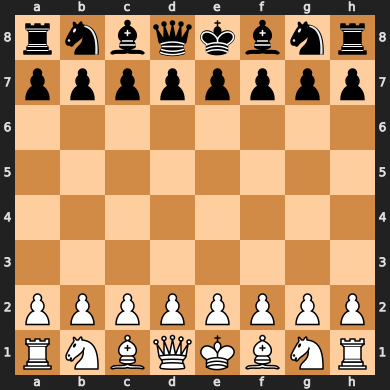

In [51]:
game.board()

In [29]:
%debug

> /home/spock/projects/ChessBot/.venv/lib/python3.8/site-packages/chess/pgn.py(1502)read_game()
   1500 
   1501     # Ignore leading empty lines and comments.
-> 1502     line = handle.readline().lstrip("\ufeff")
   1503     while line.isspace() or line.startswith("%") or line.startswith(";"):
   1504         line = handle.readline()



ipdb>  handle.readline()


*** ValueError: I/O operation on closed file


ipdb>  q


In [24]:
z

b'[Event "Rated Classical game"]\n'